# Analyzing Relative Performance of Different DP Methods

## Activate Project and Import Functions

In [1]:
] activate ..

  Activating project at `~/Documents/Class/ThAlgs/Edist`


In [2]:
using Edist, BenchmarkTools
import Plots, Random

## Read FASTA Input Data

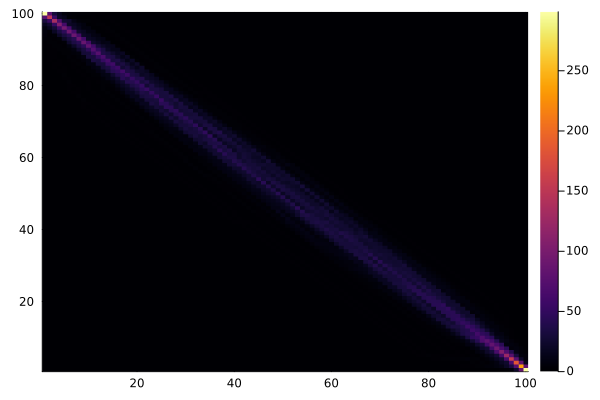

In [3]:
seq = get_fasta("../data/TP53_cross_species.fasta");
Full.visualize("../data/TP53_cross_species.fasta")

## Compare Running Time and Memory Usage

In [4]:
@benchmark score(Bounded, seq[1], seq[2])

BenchmarkTools.Trial: 358 samples with 1 evaluation.
 Range (min … max):  12.494 ms … 31.073 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     13.265 ms              ┊ GC (median):    0.00%
 Time  (mean ± σ):   13.952 ms ±  1.627 ms  ┊ GC (mean ± σ):  2.39% ± 4.19%

   ▁▃█▂▂                                                       
  ▄█████▅▄▃▃▄▃▃▃▃▂▃▂▃▃▅▆▃▄▃▃▃▃▄▆▆▄▃▂▃▂▃▄▇▃▄▃▃▂▁▂▂▁▂▁▁▃▃▁▂▁▁▂▂ ▃
  12.5 ms         Histogram: frequency by time        17.4 ms <

 Memory estimate: 18.84 MiB, allocs estimate: 31.

In [5]:
@benchmark score(Full, seq[1], seq[2])

BenchmarkTools.Trial: 192 samples with 1 evaluation.
 Range (min … max):  21.510 ms … 38.914 ms  ┊ GC (min … max): 0.00% … 13.23%
 Time  (median):     25.080 ms              ┊ GC (median):    0.00%
 Time  (mean ± σ):   26.074 ms ±  3.251 ms  ┊ GC (mean ± σ):  5.62% ±  7.29%

       ▂█▆▅ ▆▃▂ ▄   ▃    ▂  ▂                                  
  ▃▄▇▃▄████▇███▄█▇▇▄█▄▄▄▄█▅▅██▅▃▆▆▅▄▅▃▁▆▄▄▁▁▁▁▃▄▁▄▃▁▁▃▅▃▁▃▁▁▃ ▃
  21.5 ms         Histogram: frequency by time        35.2 ms <

 Memory estimate: 34.17 MiB, allocs estimate: 11.

In [6]:
@benchmark score(Hirschberg, seq[1], seq[2])

BenchmarkTools.Trial: 135 samples with 1 evaluation.
 Range (min … max):  35.789 ms … 49.616 ms  ┊ GC (min … max): 0.00% … 27.50%
 Time  (median):     36.514 ms              ┊ GC (median):    0.00%
 Time  (mean ± σ):   37.228 ms ±  2.340 ms  ┊ GC (mean ± σ):  1.81% ±  5.34%

    █▆▄▁                                                       
  ▃▅████▇▄▄▃▄▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▁▁▂▁▁▂▂▃▂▁▁▁▂▁▁▁▂ ▂
  35.8 ms         Histogram: frequency by time        46.3 ms <

 Memory estimate: 4.73 MiB, allocs estimate: 81942.

In [7]:
sequences = Random.randstring.("AGCT", 10:100:10000);
queries   = Random.randstring.("AGCT", 20:100:10000);

In [8]:
memory = zeros(3, 100)
time   = zeros(3, 100)
error = zeros(1, 100)

for i in eachindex(sequences)
    ((exact, memory[1,i]), time[1,i], _, _, _) = @timed score(Full, sequences[i], queries[i])
    ((heuristic, memory[2,i]), time[2,i], _, _, _) = @timed score(Bounded, sequences[i], queries[i])
    (_, time[3,i], memory[3,i], _, _) = @timed score(Hirschberg, sequences[i], queries[i])

    error[i] = abs(heuristic - exact)/exact
end

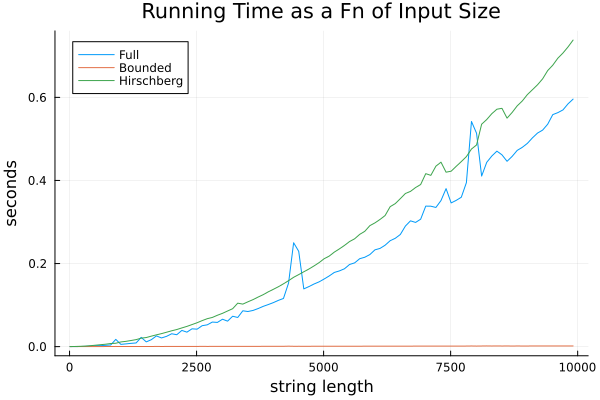

In [9]:
Plots.plot(10:100:10000, time',
           title = "Running Time as a Fn of Input Size", 
           xlabel = "string length", 
           ylabel="seconds", 
           label = ["Full" "Bounded" "Hirschberg"])

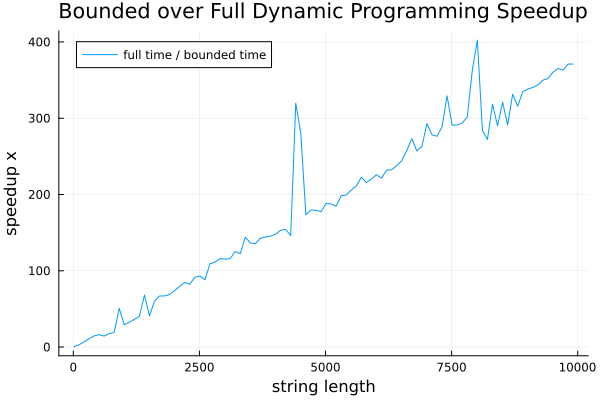

In [10]:
Plots.plot(10:100:10000, time[1,:]./time[2,:],
           title = "Bounded over Full Dynamic Programming Speedup",
           xlabel = "string length",
           ylabel = "speedup x",
           label = "full time / bounded time")

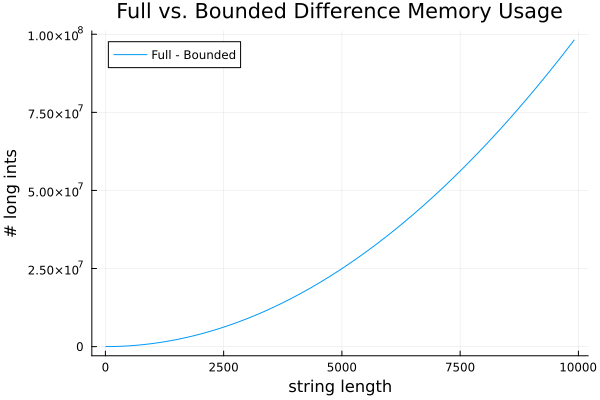

In [11]:
Plots.plot(10:100:10000, (memory[1,:] - memory[2,:])/8,
           title  = "Full vs. Bounded Difference Memory Usage",
           xlabel = "string length",
           ylabel = "# long ints",
           label  = "Full - Bounded")

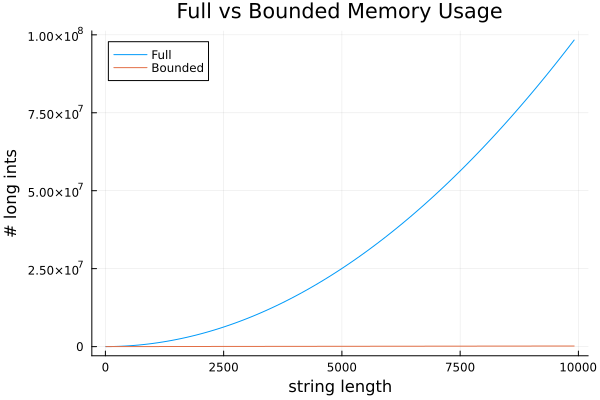

In [12]:
Plots.plot(10:100:10000, memory[1:2, :]'/8,
           title = "Full vs Bounded Memory Usage",
           xlabel = "string length",
           ylabel = "# long ints",
           label = ["Full" "Bounded"])

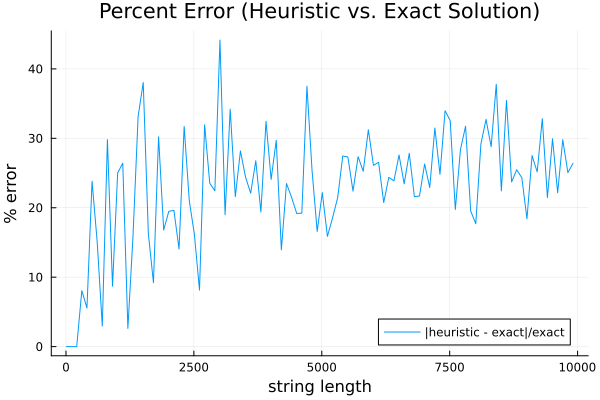

In [13]:
Plots.plot(10:100:10000, abs.(error') * 100,
           title = "Percent Error (Heuristic vs. Exact Solution)",
           xlabel = "string length",
           ylabel = "% error",
           label = "|heuristic - exact|/exact")